# Lab 4: Foundations of inference - simulating randomness
## Name
---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Exercise 1

A study in 1994 examined 491 dogs that had developed cancer and 945 dogs as a control group to determine whether there is an increased risk of cancer in dogs that are exposed to the herbicide 2,4-Dichlorophenoxyacetic acid (2,4-D). The dataset cancer_in_dogs has the data from this experiment. Load the dataset and determine the difference in proportion of dogs who developed cancer that had been exposed to 2,4-D versus those that had not been exposed.

---

Type response here.

In [2]:
cancer_in_dogs = pd.read_csv("cancer_in_dogs.csv", na_values='NaN')

cancer_in_dogs

,Unnamed: 0,order,response
0,1,"2,4-D",cancer
1,2,"2,4-D",cancer
2,3,"2,4-D",cancer
3,4,"2,4-D",cancer
4,5,"2,4-D",cancer
...,...,...,...
1431,1432,"no 2,4-D",no cancer
1432,1433,"no 2,4-D",no cancer
1433,1434,"no 2,4-D",no cancer
1434,1435,"no 2,4-D",no cancer


In [3]:
p_24D = cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('2,4-D','cancer')]
p_no_24D = cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('no 2,4-D','cancer')]
p_difference = p_24D - p_no_24D

print(p_difference)

0.06704880902542965


# Exercise 2

Create a "deck of cards" to represent the data in the cancer_in_dogs dataset. Randomize the data into the two sets of 2,4-D and no 2,4-D. Then compute the difference in proportions for your new simulated dataset. Do this a total of three times, reporting results each time.

---

Type response here.

In [4]:
sim_cancer_in_dogs = pd.DataFrame().assign(order=cancer_in_dogs['order'], response=cancer_in_dogs['response'].sample(frac=1, ignore_index=True))

p_24D = sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('2,4-D','cancer')]
p_no_24D = sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('no 2,4-D','cancer')]
p_difference = p_24D - p_no_24D

print(p_difference)

0.01463948732811643


In [5]:
sim_cancer_in_dogs = pd.DataFrame().assign(order=cancer_in_dogs['order'], response=cancer_in_dogs['response'].sample(frac=1, ignore_index=True))

p_24D = sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('2,4-D','cancer')]
p_no_24D = sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('no 2,4-D','cancer')]
p_difference = p_24D - p_no_24D

print(p_difference)

0.04546850009124187


In [6]:
sim_cancer_in_dogs = pd.DataFrame().assign(order=cancer_in_dogs['order'], response=cancer_in_dogs['response'].sample(frac=1, ignore_index=True))

p_24D = sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('2,4-D','cancer')]
p_no_24D = sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('no 2,4-D','cancer')]
p_difference = p_24D - p_no_24D

print(p_difference)

-0.0100237228823839


# Exercise 3

Repeat the simulation 1,000 times and create a histogram of the results.

---

C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

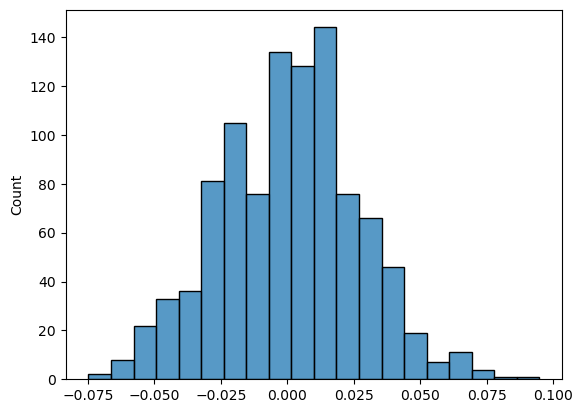

In [11]:
simulated_results = []
for x in range(1000):
    sim_cancer_in_dogs = pd.DataFrame().assign(order=cancer_in_dogs['order'], response=cancer_in_dogs['response'].sample(frac=1, ignore_index=True))
    simulated_results.append(sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('2,4-D','cancer')] - sim_cancer_in_dogs.groupby('order')['response'].value_counts(normalize=True)[('no 2,4-D','cancer')])

sns.histplot(data=simulated_results, bins=20)

# Exercise 4

Describe the histogram above. Why is the histogram shaped the way that it is? What do the data in the histogram represent? Why is the center of the histogram where it is? What assumption is being made regarding 2,4-D and cancer in dogs?

---

Type response here.

# Exercise 5

In exercise 1 you computed the difference in cancer rates observed in the study between dogs exposed to 2,4-D and those that had not been exposed. Input that value in the code below to superimpose the value on the histogram. Estimate what percent of the histogram is more extreme than the observed value (highlighted in red).

---

Type response here.

C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rcampbelliii\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


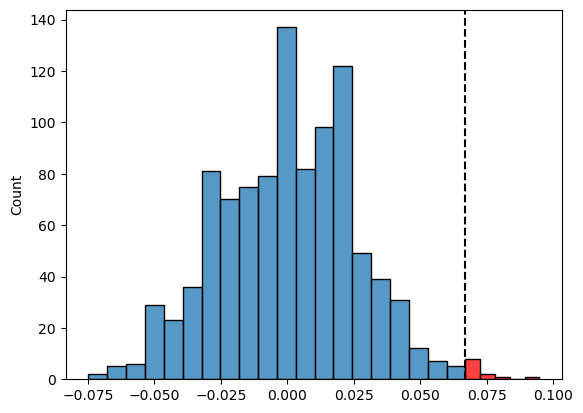

In [12]:
#Type in the observed value you found in exercise 1 in the line below.
obs_value = 0.067

ax = sns.histplot(data=[i for i in simulated_results if i <= obs_value], binrange = (min(simulated_results), obs_value))
sns.histplot(data=[i for i in simulated_results if i > obs_value], binrange = (obs_value, max(simulated_results)), color = "red")
ax.axvline(x = obs_value, ymin = 0, ymax = 1, color = "black", linestyle = "dashed")

# Exercise 6

What is the actual percent of the simulated data more extreme than the observed value from the study?

---

Type response here.

In [9]:
len([i for i in simulated_results if i > obs_value]) / len(simulated_results)

0.011

# Exercise 7

Interpret the results. What does the percent from exercise 6 mean in the context of the 2,4-D study?

---

Type response here.

# Exercise 8

Repeat all of the above for the gender_discrimination data set. The gender_discrimination data set is data from a study in the 1970s about whether gender influences hiring recommendations.

---

Type response here.